In [1]:
# Model stuff
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import scipy.io as io


#our scripts
import model_utility
import spoketools
import preprocess_filter

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd



Segmentation Models: using `tf.keras` framework.


In [2]:
model_path_1 = "../models/best/darkPDAug_spoke_360im_300e_resnet34.h5"
model_of_interest_1 = 'pixel_dropout'

model_path_2 = "../models/best/darkCLAHEAug_spoke_360im_300e_resnet34.h5"
model_of_interest_2 = 'CLAHE'

model_path_3 = "../models/best/darkGB_Callback_shuffled_spoke_360im_300e_resnet34.h5"
model_of_interest_3 = 'guassian_blur'

model_path_4 = "../models/best/dark8Aug_spoke_360im_300e_resnet34.h5"
model_of_interest_4 = 'all_eight'

model_path_5 = "../models/best/darkRBCAug_spoke_360im_300e_resnet34.h5"
model_of_interest_5 = 'random_brightness_contrast'

model_path_6 = "../models/best/darkRTCAug_spoke_360im_300e_resnet34.h5"
model_of_interest_6 = 'random_tone_curve'

model_path_7 = "../models/best/darkSharpenAug_spoke_360im_300e_resnet34.h5"
model_of_interest_7 = 'sharpen'

model_path_8 = "../models/best/darkSSRAug_spoke_360im_300e_resnet34.h5"
model_of_interest_8 = 'longitudinal_pixel_shift'

model_path_9 = "../models/best/darkVFAug_spoke_360im_300e_resnet34.h5"
model_of_interest_9 = "vertical_flip"

In [3]:
model = keras.models.load_model(model_path_9, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

folder_of_interest = '094_SPKMVLFLP'
model_of_interest = model_of_interest_9

In [4]:
# test_folder = glob.glob("../data/2023_rpjb/good/074_SPKLFMOV/*.rpjb")
# pixel_values_list = []

# for rpjb in test_folder:
    
#     filenames, pixel_values, coords = preprocess_filter.apply_filters(rpjb)
#     pixel_values, coords = preprocess_filter.buffer_image(pixel_values, 736, 160, coords)
#     pixel_values = preprocess_filter.remove_cosmic_rays(pixel_values)
#     pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
#     pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)

#     # plt.imshow(pixel_values, cmap = "gray", origin = "lower")
#     # plt.show()

#     plt.imshow(pixel_values, cmap = "gray", origin = "lower")
#     plt.show()
#     pixel_values_list.append(pixel_values)

# pixel_values_list = normalize(np.array(pixel_values_list), axis=1)


if not os.path.exists(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application'):
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application')

if not os.path.exists(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}'):
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}')
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/imagery')
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data')



    

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606371503.png


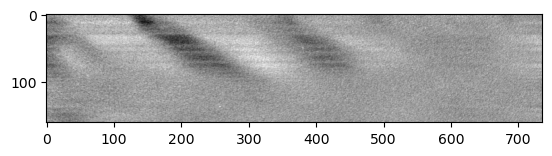

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606368495.png


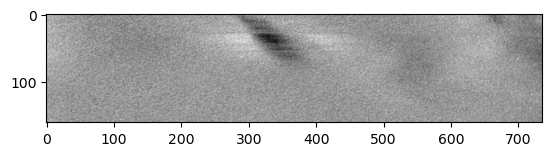

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606350447.png


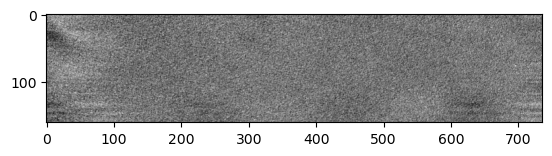

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606364735.png


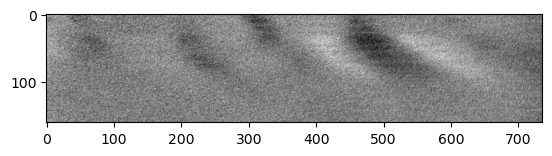

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606360223.png


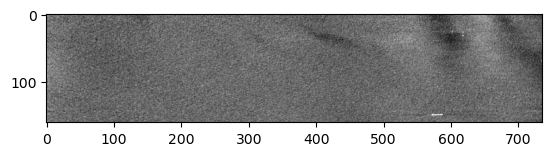

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606345935.png


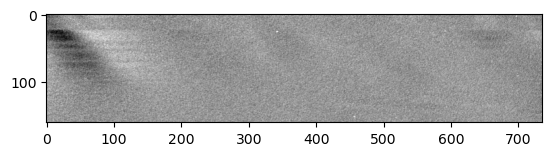

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606344431.png


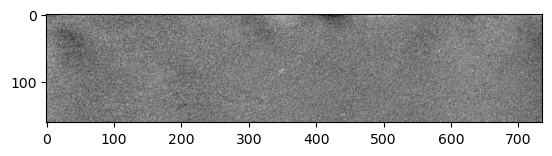

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606360975.png


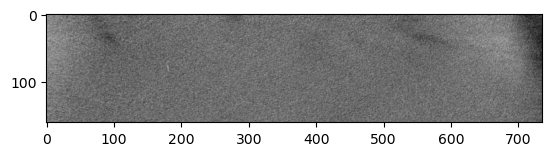

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606354959.png


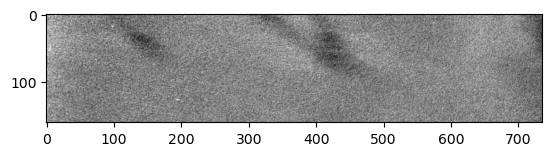

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606351951.png


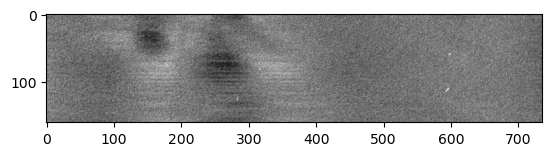

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606359471.png


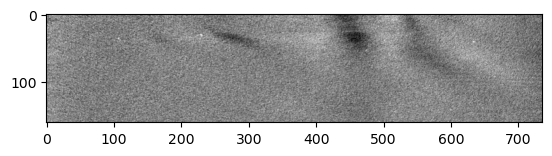

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606348191.png


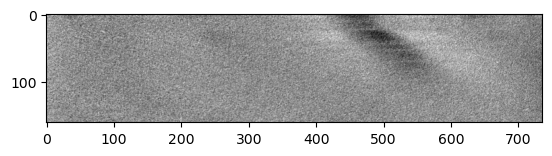

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606355711.png


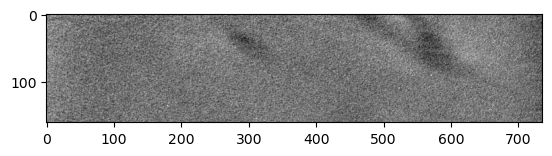

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606379775.png


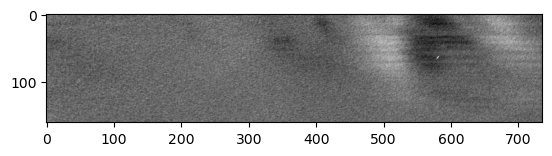

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606370751.png


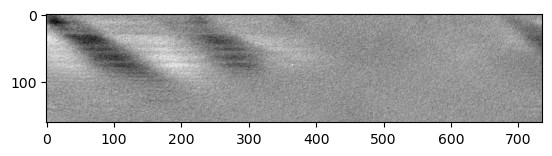

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606351199.png


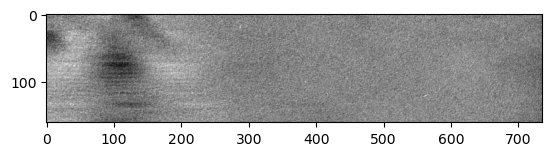

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606375263.png


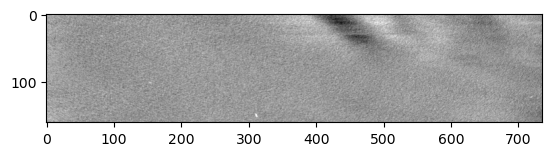

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606357215.png


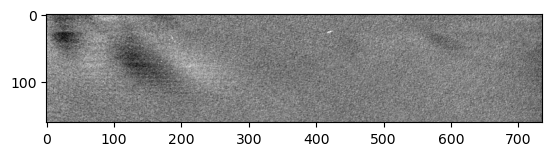

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606373759.png


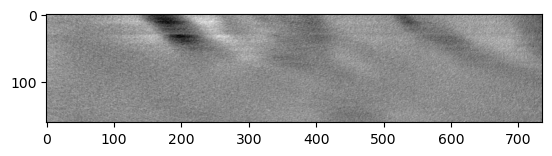

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606372255.png


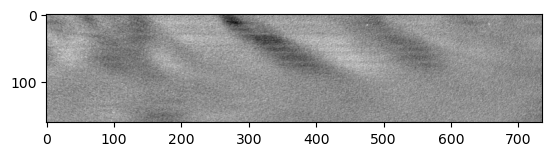

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606373007.png


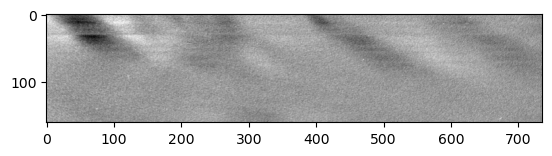

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606358719.png


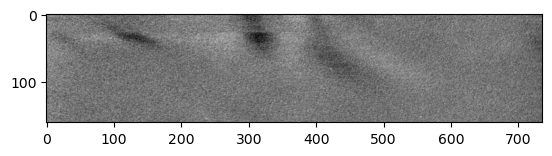

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606346687.png


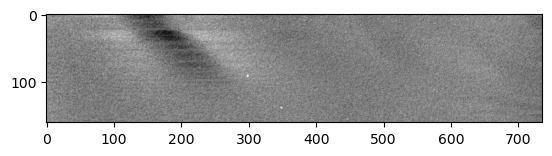

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606362479.png


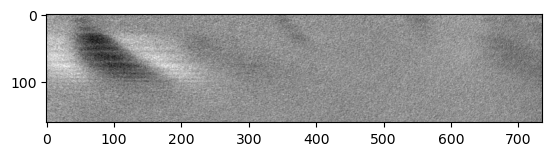

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606363983.png


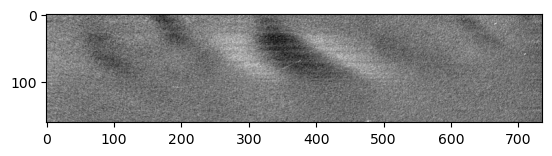

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606347439.png


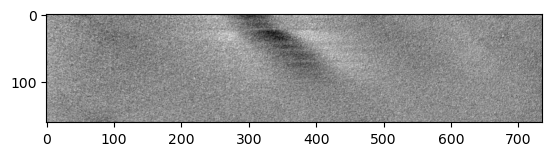

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606353455.png


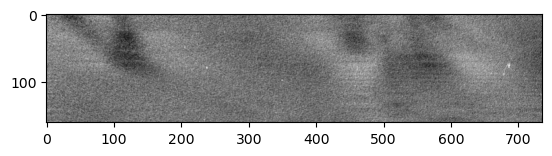

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606369247.png


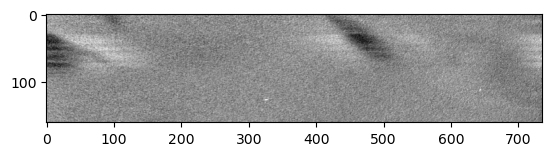

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606345183.png


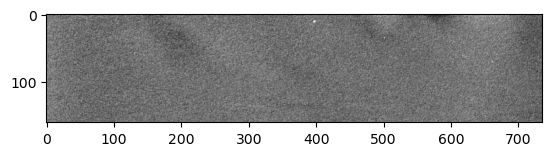

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606343679.png


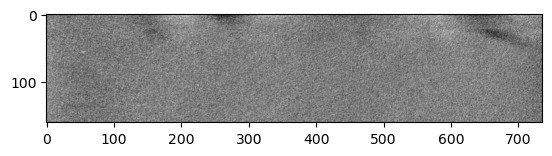

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606363231.png


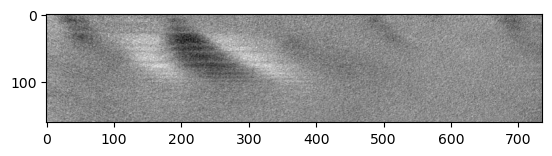

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606366991.png


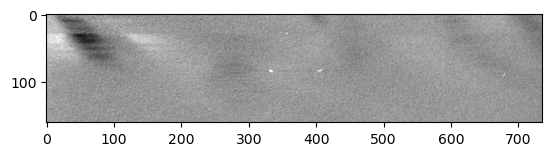

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606366239.png


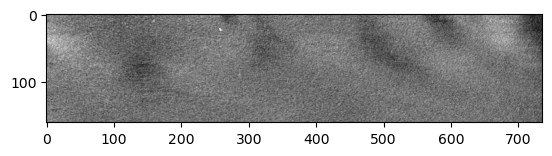

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606356463.png


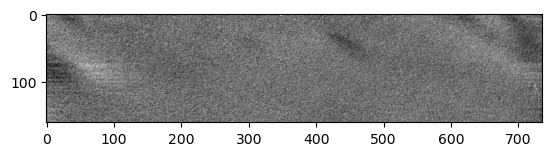

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606357967.png


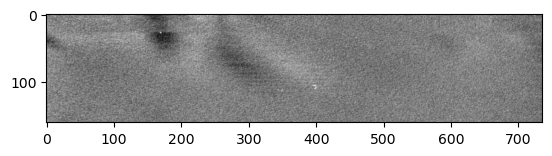

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606376767.png


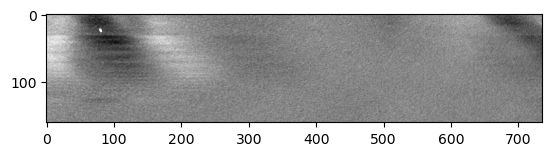

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606376015.png


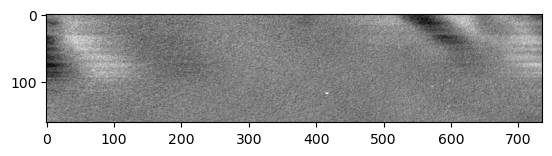

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606377519.png


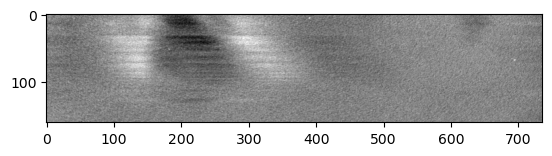

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606365487.png


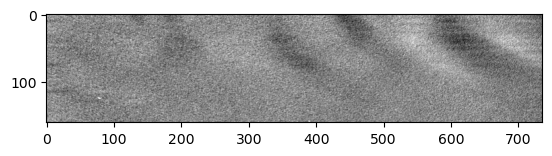

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606348943.png


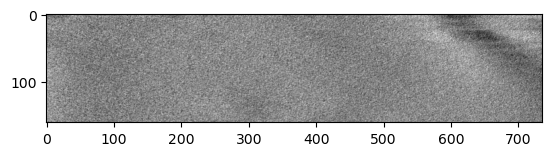

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606369999.png


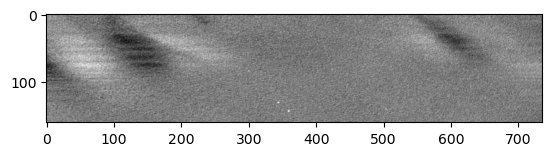

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606379023.png


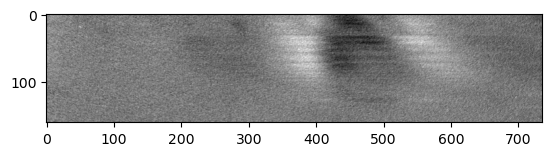

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606352703.png


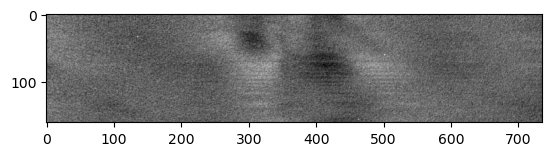

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606374511.png


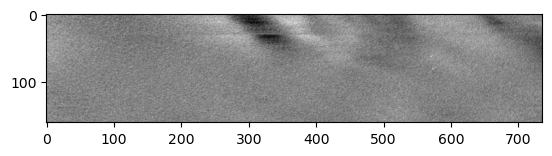

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606354207.png


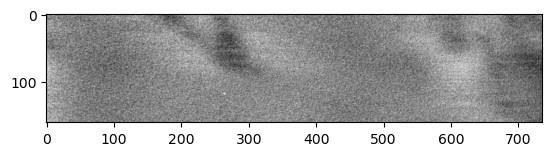

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606361727.png


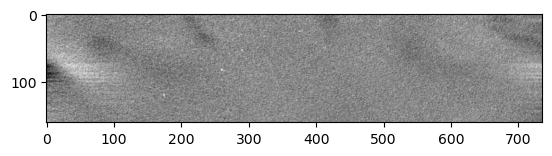

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606349695.png


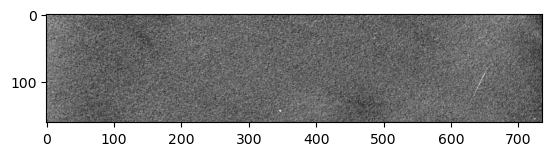

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606367743.png


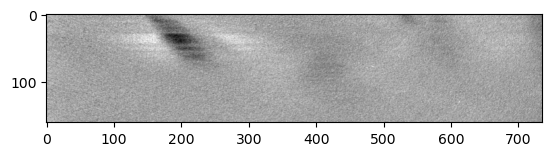

../data/2023_imagery/filtered/094_SPKMVLFLP/W1606378271.png


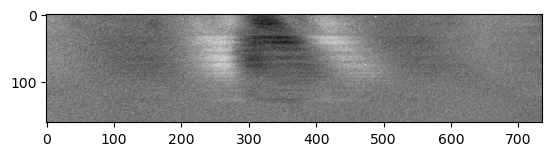

(49, 160, 736)


In [5]:
test_folder = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/*.png")
# for path in test_folder:
#     # print(path)
pixel_values_list = []

for img_path in test_folder:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        print(img_path)
        plt.imshow(img, cmap = "gray")
        plt.show()
        pixel_values_list.append(img)


pixel_values_list = normalize(np.array(pixel_values_list), axis=1)
print(pixel_values_list.shape)

1/1 [==============================] - 1s 1s/step


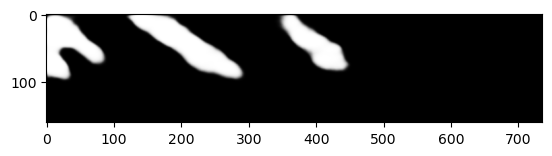

1/1 [==============================] - 0s 187ms/step


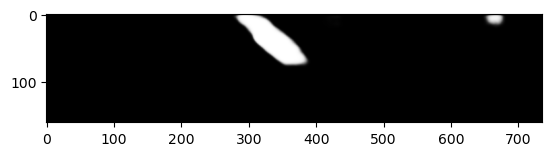

1/1 [==============================] - 0s 179ms/step


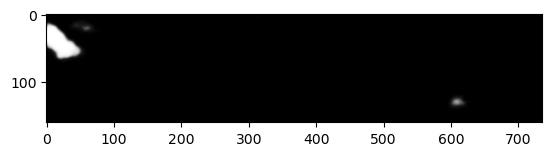

1/1 [==============================] - 0s 182ms/step


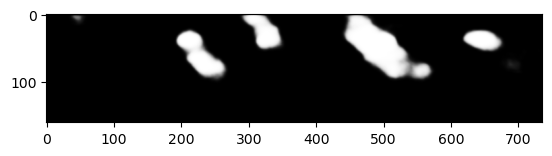

1/1 [==============================] - 0s 177ms/step


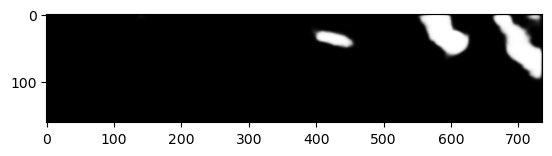

1/1 [==============================] - 0s 180ms/step


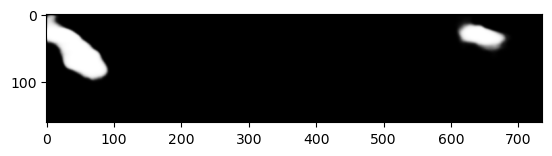

1/1 [==============================] - 0s 183ms/step


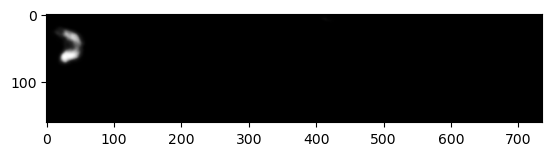

1/1 [==============================] - 0s 181ms/step


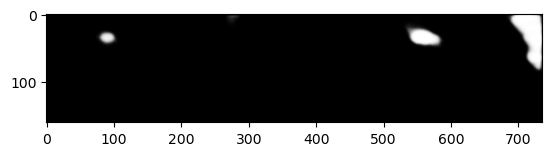

1/1 [==============================] - 0s 186ms/step


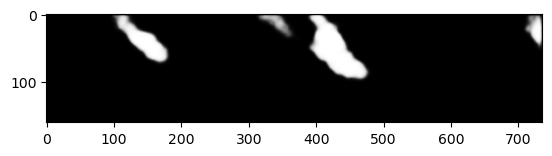

1/1 [==============================] - 0s 191ms/step


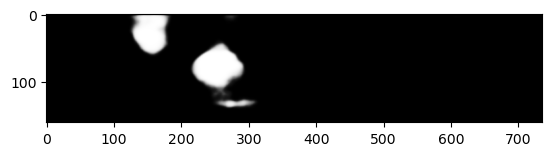

1/1 [==============================] - 0s 180ms/step


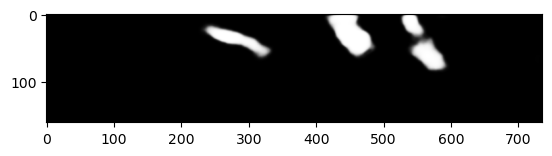

1/1 [==============================] - 0s 179ms/step


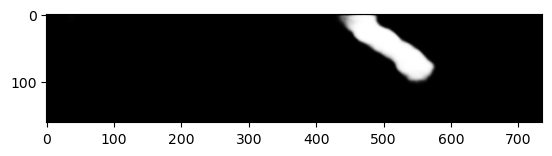

1/1 [==============================] - 0s 180ms/step


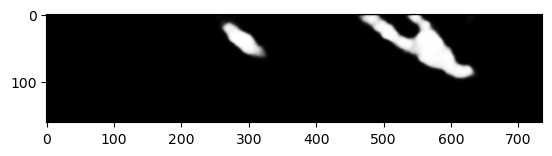

1/1 [==============================] - 0s 186ms/step


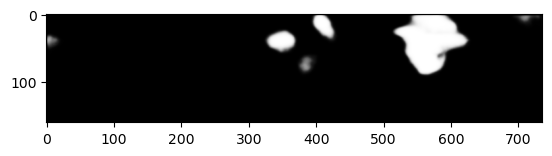

1/1 [==============================] - 0s 185ms/step


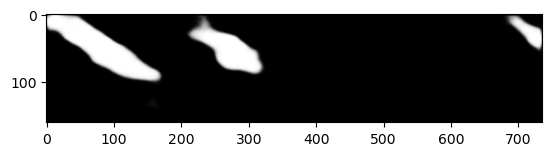

1/1 [==============================] - 0s 181ms/step


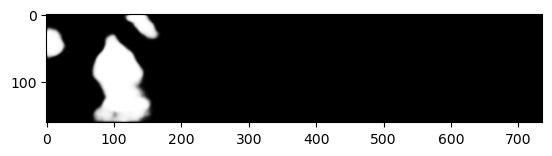

1/1 [==============================] - 0s 181ms/step


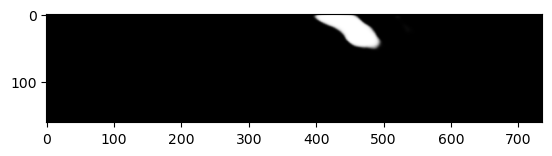

1/1 [==============================] - 0s 186ms/step


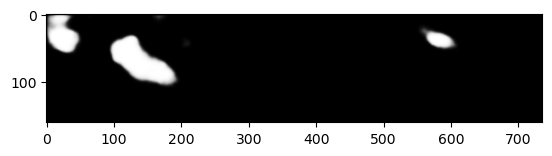

1/1 [==============================] - 0s 184ms/step


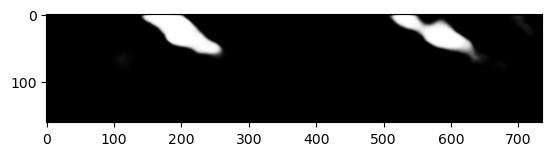

1/1 [==============================] - 0s 186ms/step


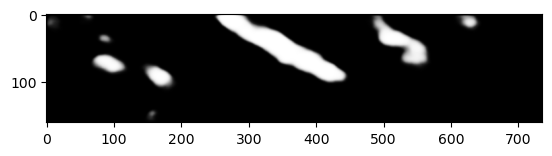

1/1 [==============================] - 0s 185ms/step


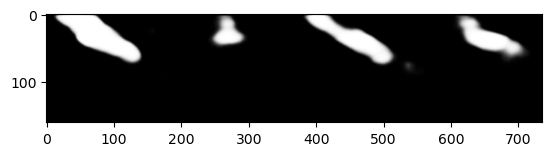

1/1 [==============================] - 0s 183ms/step


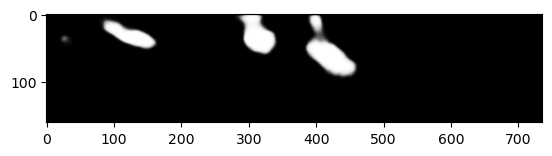

1/1 [==============================] - 0s 183ms/step


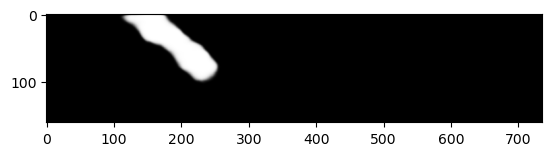

1/1 [==============================] - 0s 187ms/step


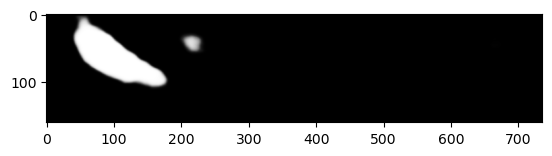

1/1 [==============================] - 0s 185ms/step


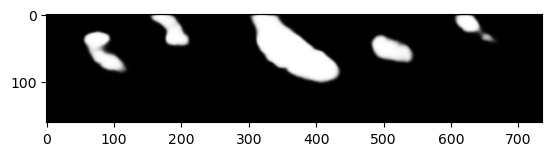

1/1 [==============================] - 0s 183ms/step


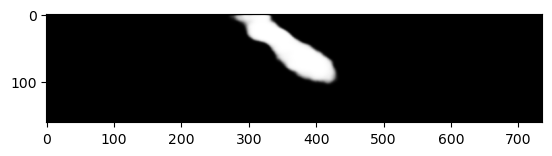

1/1 [==============================] - 0s 184ms/step


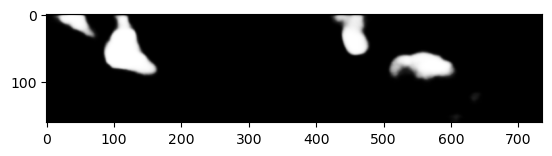

1/1 [==============================] - 0s 186ms/step


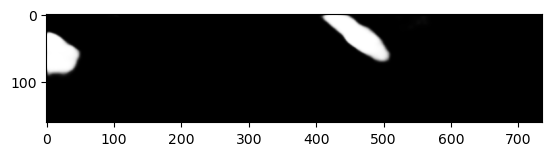

1/1 [==============================] - 0s 181ms/step


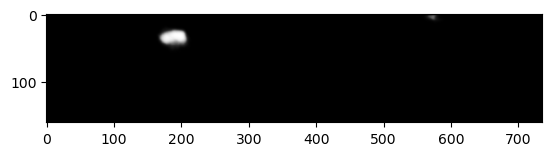

1/1 [==============================] - 0s 187ms/step


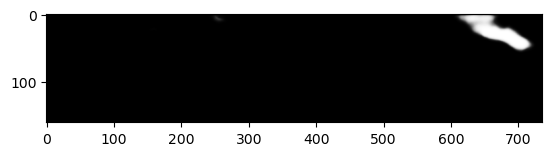

1/1 [==============================] - 0s 187ms/step


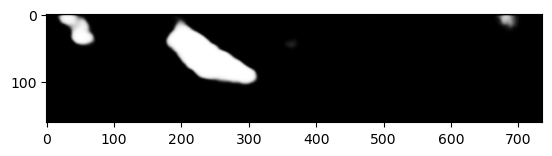

1/1 [==============================] - 0s 182ms/step


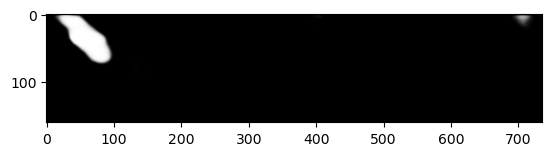

1/1 [==============================] - 0s 184ms/step


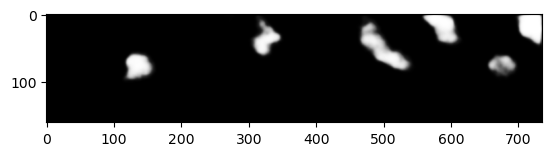

1/1 [==============================] - 0s 183ms/step


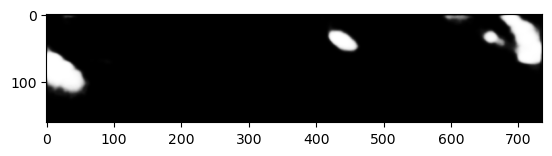

1/1 [==============================] - 0s 182ms/step


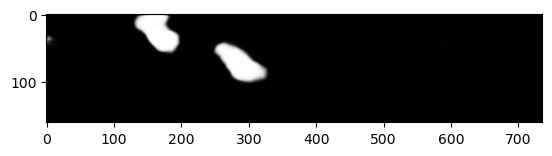

1/1 [==============================] - 0s 183ms/step


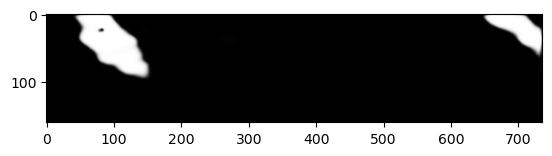

1/1 [==============================] - 0s 191ms/step


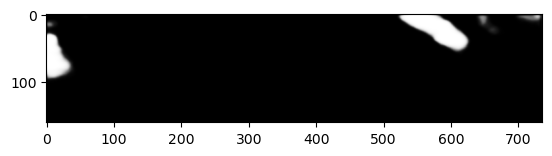

1/1 [==============================] - 0s 185ms/step


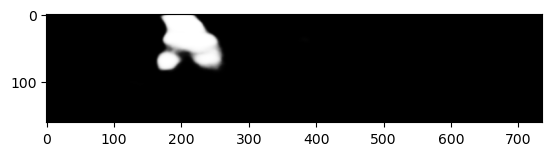

1/1 [==============================] - 0s 192ms/step


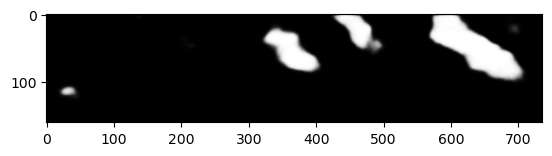

1/1 [==============================] - 0s 186ms/step


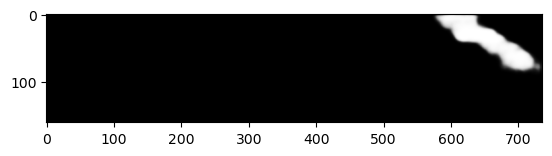

1/1 [==============================] - 0s 187ms/step


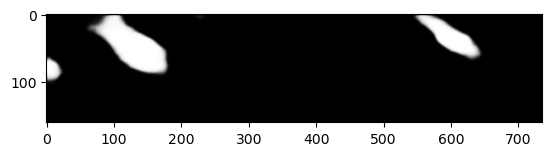

1/1 [==============================] - 0s 186ms/step


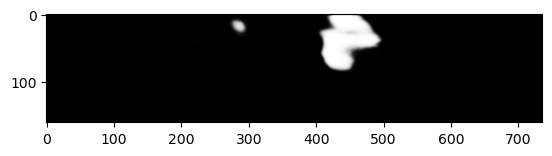

1/1 [==============================] - 0s 185ms/step


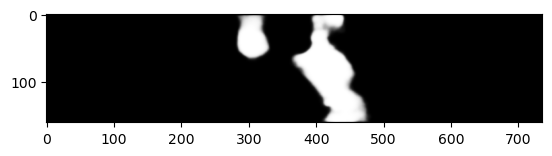

1/1 [==============================] - 0s 183ms/step


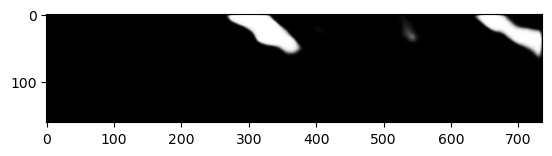

1/1 [==============================] - 0s 190ms/step


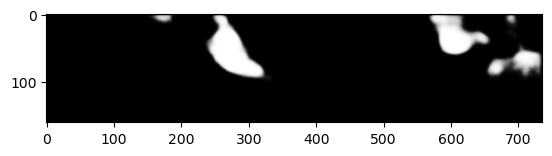

1/1 [==============================] - 0s 186ms/step


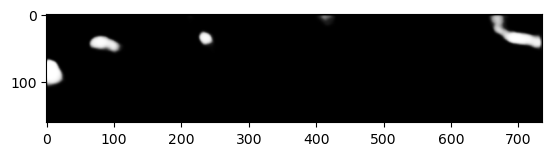

1/1 [==============================] - 0s 188ms/step


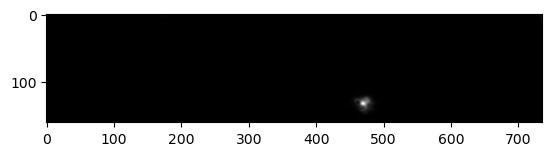

1/1 [==============================] - 0s 181ms/step


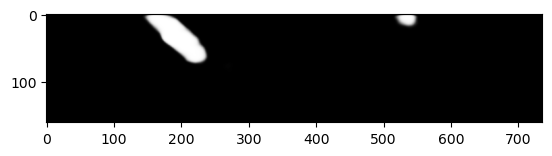

1/1 [==============================] - 0s 191ms/step


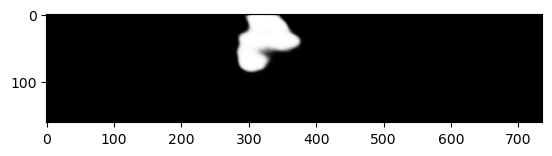

In [6]:
model_results = []

for img in  pixel_values_list:
    img = img.reshape((1, 160, 736))
    prediction = model.predict(img)
    prediction = prediction.reshape((160, 736))
    plt.imshow(prediction, cmap = "gray")
    plt.show()

    prediction[prediction > .30] = 1
    prediction[prediction <= .30] = 0
    prediction = prediction.astype(np.uint8)

    model_results.append(prediction)

model_results = np.array(model_results)

In [8]:
import create_txt_from_lucy


px_txt = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/*CALIB_ML.txt")
frame_list = []

for path in px_txt:
    frame_list.append(create_txt_from_lucy.bypixel_summary(path))
total_list = pd.concat(frame_list, axis = 0)

total_list.to_csv(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_summary.csv")


../data/2023_imagery/filtered/094_SPKMVLFLP/094_SPKMVLFLP_model_application/vertical_flip/txt_data/W1606349695_1_CALIB_ML.txt: this file is empty


In [9]:
csv_path = f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_summary.csv"
pd.read_csv(csv_path)

filename     min_rad     max_rad  min_lon  max_lon  \
0   W1606373759_1_CALIB_ML.txt  100061.728  104012.346   91.460  119.130   
1   W1606372255_1_CALIB_ML.txt  100122.699  106625.767   87.327  118.948   
2   W1606378271_1_CALIB_ML.txt   99978.947  105347.368   99.852  105.231   
3   W1606349695_1_CALIB_ML.txt         NaN         NaN      NaN      NaN   
4   W1606357967_1_CALIB_ML.txt  100457.143  106171.429   89.712   99.709   
5   W1606379775_1_CALIB_ML.txt   99915.254  105572.034   83.702  119.695   
6   W1606345935_1_CALIB_ML.txt  100787.120  105939.177   82.912  114.575   
7   W1606366991_1_CALIB_ML.txt  100219.124  104521.912   84.126  121.941   
8   W1606363983_1_CALIB_ML.txt  100314.342  106208.251   86.155  118.312   
9   W1606350447_1_CALIB_ML.txt  101373.626  104175.824   82.947   85.407   
10  W1606354207_1_CALIB_ML.txt  100542.056  105757.009   90.962  119.408   
11  W1606373007_1_CALIB_ML.txt  100102.669  104599.589   84.222  122.902   
12  W1606376015_1_CALIB_ML.txt  100000.000  105875.000   83.511  125.021   
13  W1606379023_1_CALIB_ML.txt   99957.717  105221.987   99.529  112.157   
14  W1606377519_1_CALIB_ML.txt  100000.000  105157.233   93.008   98.425   
15  W1606355711_1_CALIB_ML.txt  100508.475  105819.209   96.141  114.817   
16  W1606345183_1_CALIB_ML.txt  101978.610  103101.604   90.722   92.523   
17  W1606369247_1_CALIB_ML.txt  100161.290  105544.355   83.333  111.185   
18  W1606353455_1_CALIB_ML.txt  100558.659  105921.788   83.793  112.825   
19  W1606374511_1_CALIB_ML.txt  100041.322  103884.298   98.642  124.836   
20  W1606359471_1_CALIB_ML.txt  100422.265  105143.954   95.237  113.582   
21  W1606371503_1_CALIB_ML.txt  100142.566  106008.147   83.385  108.145   
22  W1606357215_1_CALIB_ML.txt  100474.383  106394.687   83.147  113.735   
23  W1606368495_1_CALIB_ML.txt  100180.723  104698.795   98.595  120.172   
24  W1606370751_1_CALIB_ML.txt  100162.272  106186.613   83.387  123.935   
25  W1606360975_1_CALIB_ML.txt  100386.847  105087.041   87.243  121.342   
26  W1606352703_1_CALIB_ML.txt  100575.139  109424.861   96.883  106.308   
27  W1606347439_1_CALIB_ML.txt  100702.703  106216.216   96.040  103.102   
28  W1606351199_1_CALIB_ML.txt  100588.235  109356.618   83.002   91.056   
29  W1606348191_1_CALIB_ML.txt  100687.161  106057.866  103.630  110.166   
30  W1606346687_1_CALIB_ML.txt  100718.133  106050.269   88.266   94.813   
31  W1606376767_1_CALIB_ML.txt  100020.877  105845.511   86.064  125.335   
32  W1606369999_1_CALIB_ML.txt  100141.700  106093.117   83.392  118.707   
33  W1606364735_1_CALIB_ML.txt  100295.858  105917.160   93.496  119.191   
34  W1606361727_1_CALIB_ML.txt  100485.437  106485.437   83.100  121.545   
35  W1606360223_1_CALIB_ML.txt  100404.624  105895.954  103.804  121.151   
36  W1606343679_1_CALIB_ML.txt  100759.717  103568.905  110.856  115.689   
37  W1606365487_1_CALIB_ML.txt  100256.917  107312.253   84.404  121.086   
38  W1606356463_1_CALIB_ML.txt  100491.493  107069.943   83.043  120.128   
39  W1606367743_1_CALIB_ML.txt  100200.000  104520.000   91.230  113.038   
40  W1606363231_1_CALIB_ML.txt  100332.681  106379.648   84.197  119.835   
41  W1606362479_1_CALIB_ML.txt  100584.795  106608.187   85.330   95.210   
42  W1606375263_1_CALIB_ML.txt  100020.747  103132.780  106.022  111.440   
43  W1606366239_1_CALIB_ML.txt  100238.095  105892.857   89.571  122.754   
44  W1606354959_1_CALIB_ML.txt  100525.328  105872.420   88.058  119.711   
45  W1606344431_1_CALIB_ML.txt  102074.468  104521.277   83.885   85.262   
46  W1606348943_1_CALIB_ML.txt  100636.364  105163.636  110.499  117.837   
47  W1606358719_1_CALIB_ML.txt  100439.771  105659.656   87.464  106.632   
48  W1606351951_1_CALIB_ML.txt  100571.956  108154.982   89.168   97.952   

    num_spokes  avg_spoke_intensity  num_pix  avg_pix_per_spoke  
0            2             0.000668     6621           3310.500  
1            5             0.000051    10513           2102.600  
2            1         

In [10]:
import create_txt_from_lucy

frame_list = []
px_txt = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/*CALIB_ML.txt")

for path in px_txt:
     frame_list.append(create_txt_from_lucy.create_perSpoke_data(path))



total_list_perSpoke = pd.concat(frame_list, axis = 0)

total_list_perSpoke.to_csv(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_perSpoke.csv")


In [11]:
csv_path = f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_perSpoke.csv"
pd.read_csv(csv_path)

filename  spoke_num        min_rad        max_rad     min_lon  \
0    W1606373759          1  100061.728395  104012.345679  112.072223   
1    W1606373759          2  100061.728395  103765.432099   91.460052   
2    W1606372255          1  104846.625767  106625.766871   91.661695   
3    W1606372255          2  103803.680982  105398.773006   87.327029   
4    W1606372255          3  100306.748466  104662.576687  110.445246   
..           ...        ...            ...            ...         ...   
125  W1606358719          2  100439.770554  105659.655832  102.890262   
126  W1606358719          3  100439.770554  103766.730402   97.765136   
127  W1606351951          1  107601.476015  108154.981550   95.414543   
128  W1606351951          2  102952.029520  106826.568266   93.560040   
129  W1606351951          3  100571.955720  103837.638376   89.167797   

        max_lon  mean_intensity  pixel_count  
0    119.129652        0.001214         3164  
1     98.013378        0.000168         3457  
2     93.773455        0.000364          846  
3     89.883371       -0.000221          875  
4    114.835485        0.001019         2417  
..          ...             ...          ...  
125  106.631605       -0.001237         2992  
126  100.532704        0.001050         2106  
127   97.952284        0.001403          423  
128   97.220243       -0.002045         3474  
129   91.803143        0.000952         2590  

[130 rows x 8 columns]